In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

In [2]:
digits=load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [3]:
digits.keys()
df=pd.DataFrame(digits.data)

In [4]:
print(df.head())

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]


In [5]:
print(df.shape)

(1797, 64)


In [6]:
df.columns
df.isnull().sum()
df['target']=digits.target
df.head()
print(digits.data.shape)

(1797, 64)


In [7]:
print(digits.target.shape)

(1797,)


In [8]:
df.target
df.values
x=df.drop(['target'],axis='columns')
y=df.target
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=12)

In [9]:
print(len(x_train))
print(len(x_test))

1437
360


In [10]:
model1=SVC(kernel='rbf',random_state=0, probability=True)
model1.fit(x_train,y_train)
y_pred_1=model1.predict(x_test)
print("Model Score of Kernal(rbf) :", model1.score(x_test,y_test))

Model Score of Kernal(rbf) : 0.9916666666666667


In [11]:
model2=SVC(kernel='linear',random_state=0, probability=True)
model2.fit(x_train,y_train)
y_pred_2=model2.predict(x_test)
print("Model Score of Kernal(linear) :", model2.score(x_test,y_test))

Model Score of Kernal(linear) : 0.975


In [12]:
model3=SVC(kernel='poly',random_state=0, probability=True)
model3.fit(x_train,y_train)
y_pred_3=model3.predict(x_test)
print("Model Score of Kernal(poly) :", model3.score(x_test,y_test))

Model Score of Kernal(poly) : 0.9944444444444445


In [14]:
accuracy=accuracy_score(y_test,y_pred_3)
print('Accuracy is',accuracy)

Accuracy is 0.9944444444444445


In [16]:
cm=np.array(confusion_matrix(y_test,y_pred_3))
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]], dtype=int64)

In [17]:
mse=mean_squared_error(y_test,y_pred_3)
mse

0.08888888888888889

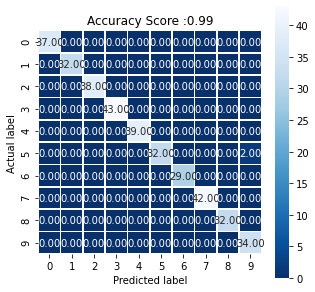

In [18]:
model1_C=SVC(C=3)
model1_C.fit(x_train,y_train)
model1_C.score(x_test,y_test)
model2_C=SVC(C=3)
model2_C.fit(x_train,y_train)
model2_C.score(x_test,y_test)
model3_C=SVC(C=3)
model3_C.fit(x_train,y_train)
model3_C.score(x_test,y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
A=f'Accuracy Score :{accuracy:.2f}'
plt.title(A)
plt.show()